In [1]:
%load_ext autoreload
%autoreload 2

%cd '..'

/dss/dsshome1/03/di93fup/polarization_reddit


In [2]:
import logging

# logging.basicConfig(
#     level=logging.INFO,
#     format="%(asctime)s [%(levelname)s] %(message)s",
#     handlers=[
#         logging.FileHandler("data/logs/events_polarization_notebook.log"),
#         logging.StreamHandler()
#     ]
# )

In [2]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

from eda.constants import (
    FIGURES_DIR,
    FIG_SIZE,
)
from polarization.utils import (
    calculate_polarization,
    calculate_polarization_by_time,
)
from preprocessing.utils import (
    load_event_comments,
    load_event_vocab,
)
from preprocessing.constants import (
    OUTPUT_DIR,
    EVENTS_INFO,
)

sns.set(rc={"figure.figsize": FIG_SIZE})


In [3]:
EVENT_KEY = "us_elections_2016"
EVENT_DETAILS = EVENTS_INFO[EVENT_KEY]

logging.info(EVENT_DETAILS)

In [ ]:
logging.info(EVENT_DETAILS["name"])

event_comments = load_event_comments(EVENT_KEY)
event_vocab = load_event_vocab(EVENT_KEY)

In [ ]:
logging.info("Calculating leave-out polarization...")

event_polarization = calculate_polarization(
    event_comments,
    event_vocab,
    method="leaveout"
)

logging.info("Saving leave-out polarization...")
with open(f"{OUTPUT_DIR}/{EVENT_KEY}_leaveout_polarization.json", "w") as file:
    json.dump(event_polarization, file)


In [ ]:
# Plot user polarization
_, (dem_polarization, rep_polarization) = event_polarization

user_pols = pd.DataFrame(
    zip(
        dem_polarization + rep_polarization,
        ["dem"] * len(dem_polarization) + ["rep"] * len(dem_polarization),
    ),
    columns=["polarization", "affiliation"],
)

ax = sns.boxplot(y="polarization", x="affiliation", data=user_pols)

ax.set_xlabel("Affiliation")
ax.set_ylabel("User polarization")
ax.set_title(EVENT_DETAILS["name"])

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_user_leaveout_polarization.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)

plt.show()


In [ ]:
event_comments["datetime"] = pd.to_datetime(
    event_comments["created_utc"],
    unit="s",
)


In [ ]:
logging.info("Calculating leave-out polarization by week...")

pol_by_week_events = calculate_polarization_by_time(
    event_comments,
    event_vocab,
    freq="W",
)

logging.info("Saving weekly polarization data...")
pol_by_week_events.to_parquet(
    f"{OUTPUT_DIR}/{EVENT_KEY}_leaveout_polarization_by_week.parquet",
    index=False,
)


In [4]:
# pol_by_week_events = pd.read_parquet(
#     f"{OUTPUT_DIR}/{EVENT_KEY}_leaveout_polarization_by_week.parquet"
# )


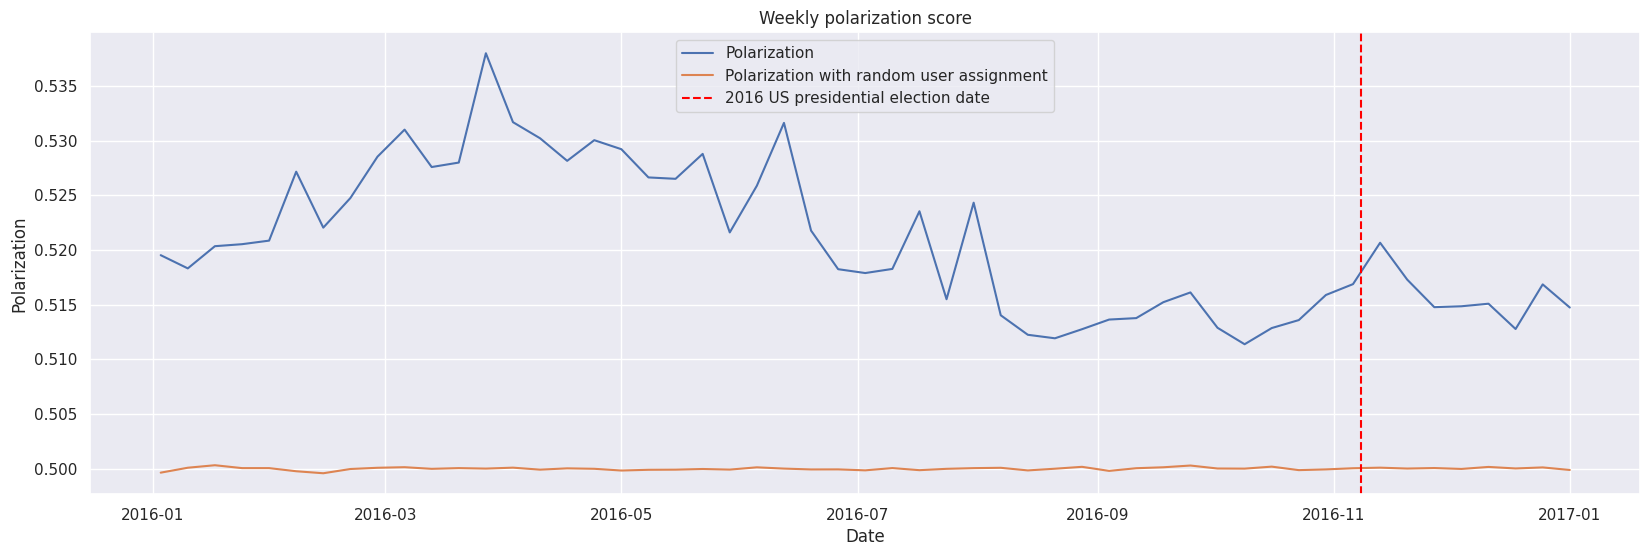

In [18]:
# Plot weekly polarization

ax = sns.lineplot(
    x=pol_by_week_events["date"],
    y=pol_by_week_events["polarization"],
    label="Polarization",
)
sns.lineplot(
    data=pol_by_week_events,
    x="date",
    y="random_polarization",
    label="Polarization with random user assignment",
)

plt.axvline(
    EVENTS_INFO[EVENT_KEY]["date"],
    linestyle="--",
    color="red",
    label=f"{EVENTS_INFO[EVENT_KEY]['name']} date",
)

plt.xlabel("Date")
plt.ylabel("Polarization")
plt.title("Weekly polarization score")
plt.legend()

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_leaveout_polarization_by_week.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)
plt.show()


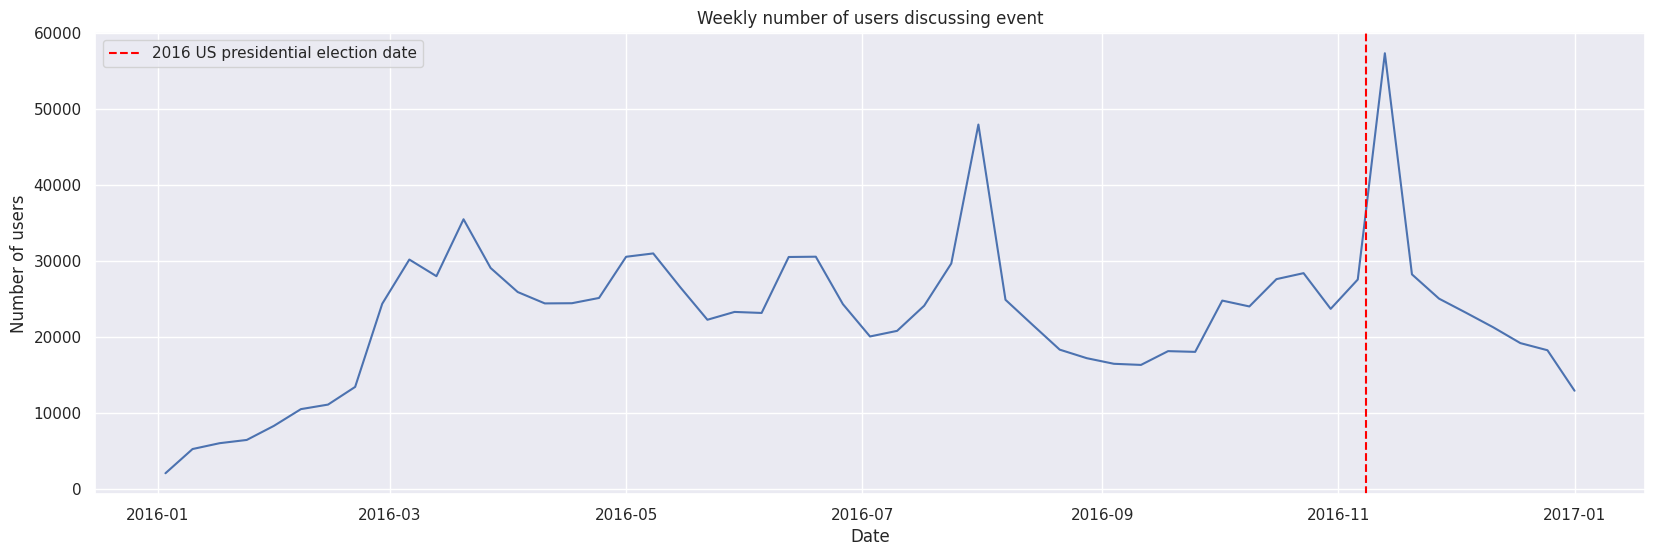

In [22]:
# Plot weekly user count

ax = sns.lineplot(
    x=pol_by_week_events["date"],
    y=pol_by_week_events["user_cnt"],
)

plt.axvline(
    EVENTS_INFO[EVENT_KEY]["date"],
    linestyle="--",
    color="red",
    label=f"{EVENTS_INFO[EVENT_KEY]['name']} date",
)

plt.xlabel("Date")
plt.ylabel("Number of users")
plt.title("Weekly number of users discussing event")
plt.legend()

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_nr_users_by_week.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)
plt.show()


In [ ]:
logging.info("Calculating leave-out polarization by day...")

pol_by_day_events = calculate_polarization_by_time(
    event_comments,
    event_vocab,
    freq="D",
)

logging.info("Saving daily polarization data...")
pol_by_day_events.to_parquet(
    f"{OUTPUT_DIR}/{EVENT_KEY}_polarization_by_day.parquet",
    index=False,
)


In [29]:
# pol_by_day_events = pd.read_parquet(
#     f"{OUTPUT_DIR}/{EVENT_KEY}_leaveout_polarization_by_day.parquet"
# )

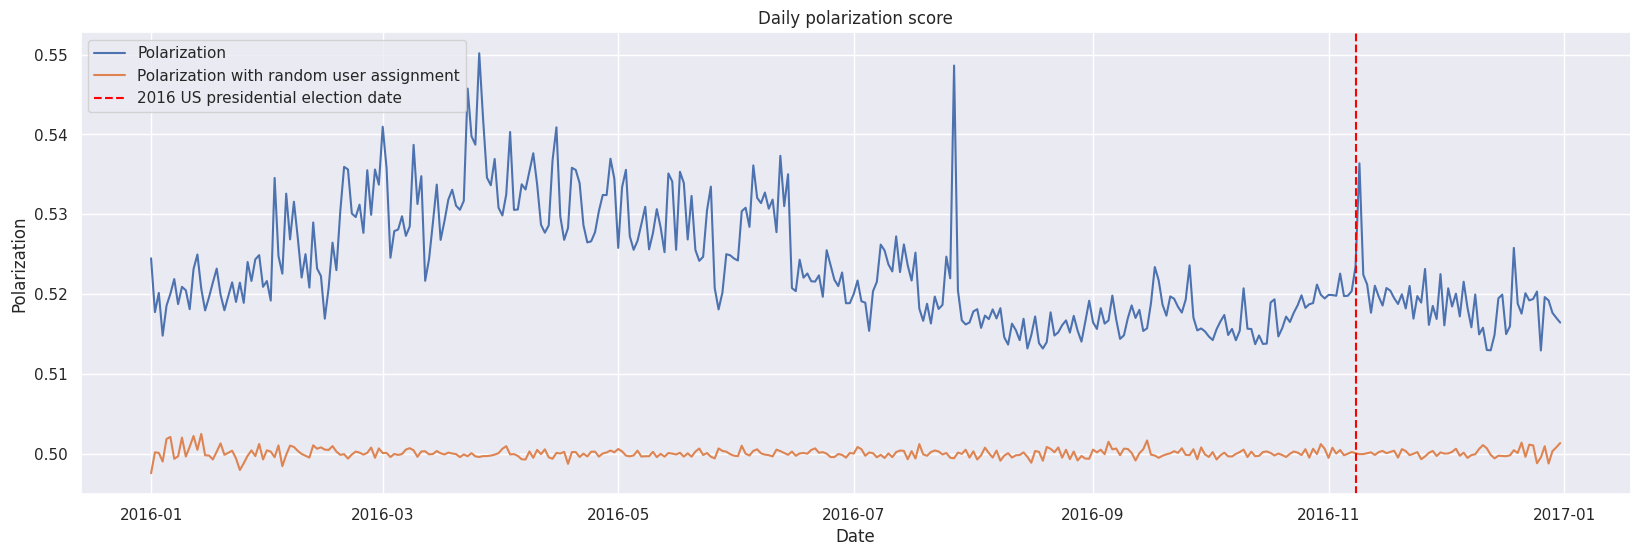

In [35]:
# Plot daily polarization

ax = sns.lineplot(
    x=pol_by_day_events["date"],
    y=pol_by_day_events["polarization"],
    label="Polarization",
)
sns.lineplot(
    data=pol_by_day_events,
    x="date",
    y="random_polarization",
    label="Polarization with random user assignment",
)

plt.axvline(
    EVENTS_INFO[EVENT_KEY]["date"],
    linestyle="--",
    color="red",
    label=f"{EVENTS_INFO[EVENT_KEY]['name']} date",
)

plt.xlabel("Date")
plt.ylabel("Polarization")
plt.title("Daily polarization score")
plt.legend()

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_leaveout_polarization_by_day.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)
plt.show()


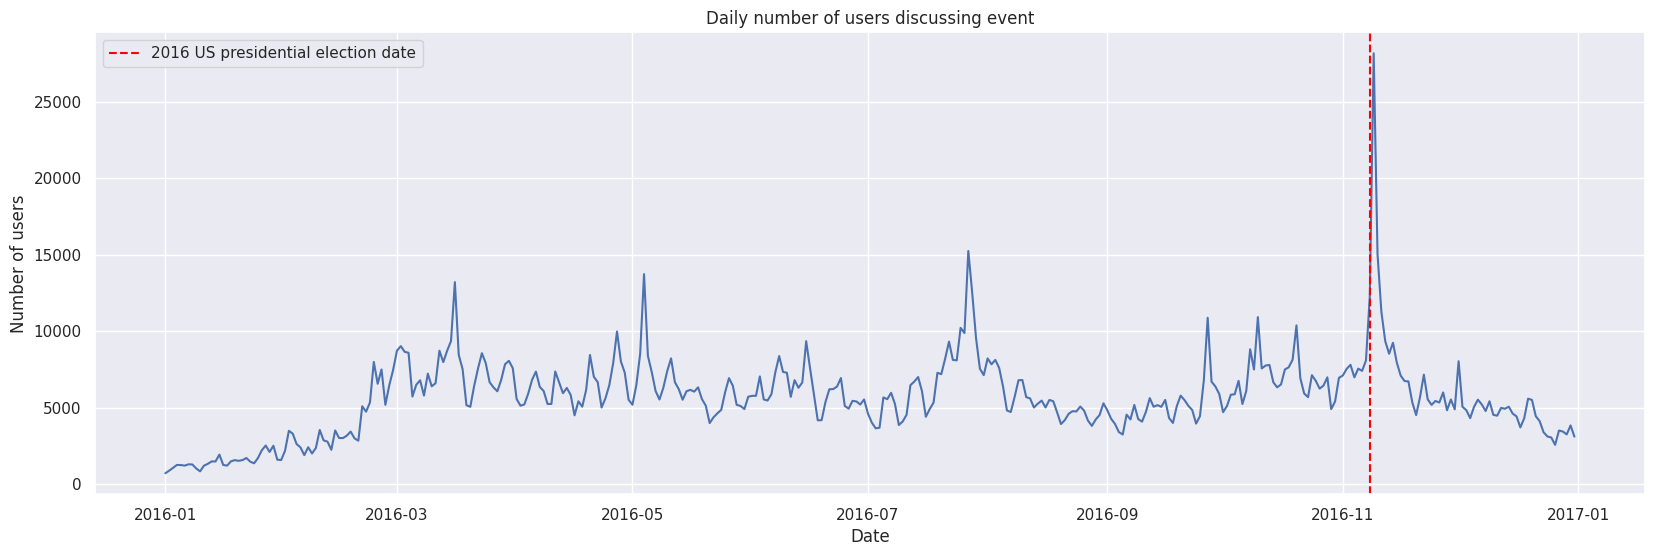

In [34]:
# Plot weekly user count

ax = sns.lineplot(
    x=pol_by_day_events["date"],
    y=pol_by_day_events["user_cnt"],
)

plt.axvline(
    EVENTS_INFO[EVENT_KEY]["date"],
    linestyle="--",
    color="red",
    label=f"{EVENTS_INFO[EVENT_KEY]['name']} date",
)

plt.xlabel("Date")
plt.ylabel("Number of users")
plt.title("Daily number of users discussing event")
plt.legend()

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_nr_users_by_day.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)
plt.show()
